In [1]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get the latest time series and save to disk

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
r = requests.get(url, allow_redirects=True)
open('covid_deaths.csv', 'wb').write(r.content)

37485

# parse it to a DataFrame

In [3]:
df = pd.read_csv('covid_deaths.csv')

In [4]:
df[:5]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,4
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3,4,4,4,7,9,11,15,17,17
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df[df["Country/Region"] == 'Germany']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
120,NaN,Germany,51.0,9.0,0,0,0,0,0,0,...,9,11,17,24,28,44,67,84,94,123


# compare France and Italy over the last 30 days

In [5]:
df.iloc[[116,137],-30:]

,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
116,1,1,1,2,2,2,2,2,3,4,...,91,91,148,148,148,243,450,562,674,860
137,3,7,10,12,17,21,29,34,52,79,...,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077


# Graph them just to see

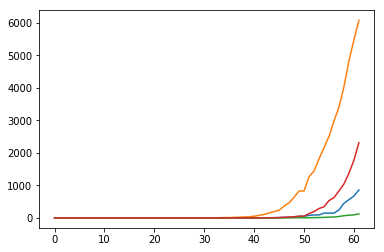

In [6]:
cc = [116,137,120,201]
for x in cc:
    Y = df.iloc[x].values[4:]
    plt.plot(np.arange(len(Y)),Y)

## Calculate rolling averages for some countries for the last 36 days

In [167]:
df.iloc[[116,137,120,201],1]

116     France
137      Italy
120    Germany
201      Spain
Name: Country/Region, dtype: object

In [7]:
sta = -36
data = [df.iloc[nn ,sta:].rolling(5).sum() for nn in [116,137,120,201] ]

In [11]:
rr = [ x[x>0].values for x in data]

In [9]:
rr[0][1:]/rr[0][:-1]

array([1.        , 1.        , 1.        , 1.        , 1.2       ,
       1.16666667, 1.14285714, 1.125     , 1.11111111, 1.1       ,
       1.18181818, 1.15384615, 1.26666667, 1.36842105, 1.30769231,
       1.44117647, 1.30612245, 1.421875  , 1.42857143, 1.28461538,
       1.35928144, 1.31718062, 1.19397993, 1.28011204, 1.21881838,
       1.12387792, 1.2428115 , 1.46143959, 1.36411609, 1.33913604,
       1.34280212])

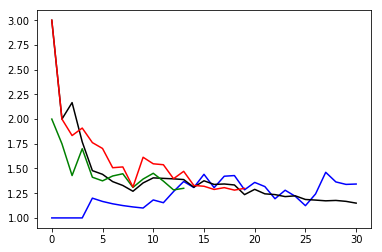

In [10]:
sty = ['r','g','k','b']
for x in rr:
    plt.plot( np.arange(len(x)-1),x[1:] / x[:-1], sty.pop())


In [143]:
sty = ['r','g','b']
sty.pop()

'b'